In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
facilities = pd.read_json('../data/facility.json')
rooms = pd.read_json('../data/kost_room.json')
kosts = pd.read_json('../data/kost.json')

# Merge data
merged_data = pd.merge(rooms, facilities, left_on='kost_id', right_on='id', suffixes=('_room', '_facility'))
merged_data = pd.merge(merged_data, kosts, left_on='kost_id', right_on='id', suffixes=('', '_kost'))

# Display a few rows of the merged data
print(merged_data.head())

   id_room  kost_id              name  size including_electricity bathroom  \
0        0        0          Standard  12.0                   Yes   Indoor   
1        1        1          Standard  12.0                   Yes   Indoor   
2        2        2   Pocket Single A   7.4                    No   Indoor   
3        3        2  Compact Single A   8.1                    No   Indoor   
4        4        2  Regular Single A  10.5                    No   Indoor   

   bedsize                      facilities    price  id  ... guest_room  \
0  100x200             Kursi, Lemari, Meja  1600000   0  ...         No   
1  100x200      Kursi, Lemari, Meja, Sprei  1600000   1  ...         No   
2  100x200      Kursi, Lemari, Meja, Sprei  1400000   2  ...        Yes   
3  100x200      Kursi, Lemari, Meja, Sprei  2000000   2  ...        Yes   
4  100x200  AC, Kursi, Lemari, Meja, Sprei  2500000   2  ...        Yes   

  laundry id_kost                                         name_kost  \
0      No

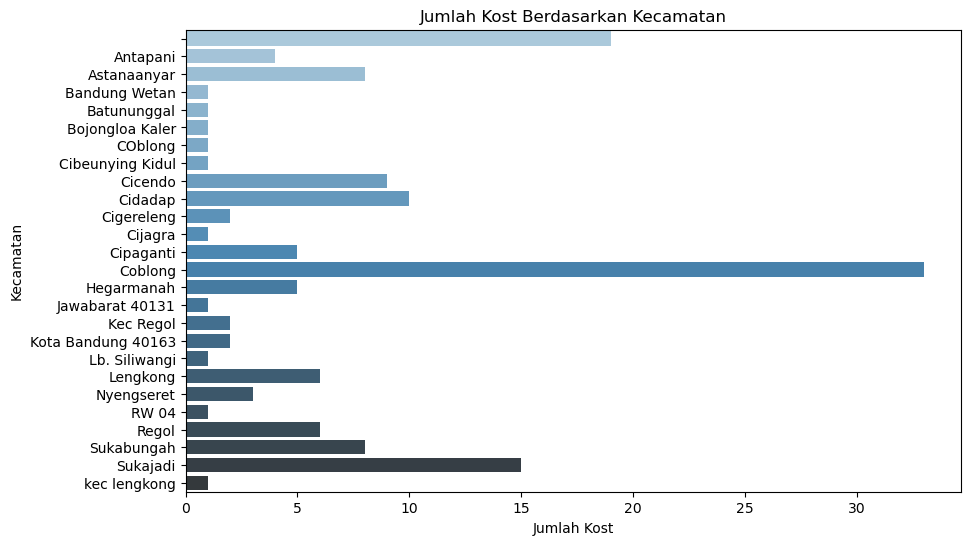

In [15]:
# Count kost by district
kost_by_district = merged_data.groupby('district').size().reset_index(name='count')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='district', data=kost_by_district, palette='Blues_d')
plt.title('Jumlah Kost Berdasarkan Kecamatan')
plt.xlabel('Jumlah Kost')
plt.ylabel('Kecamatan')
plt.show()

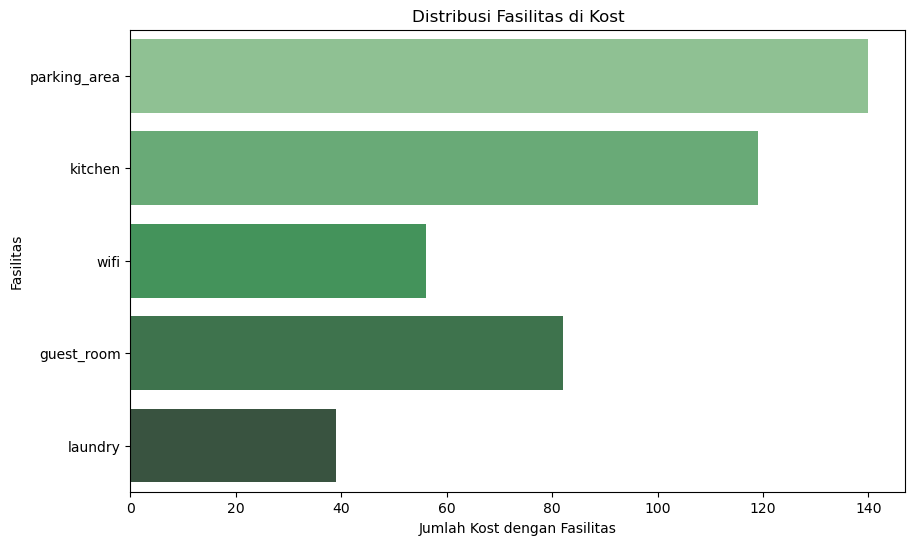

In [16]:
# Count the number of kost with each facility
facility_columns = ['parking_area', 'kitchen', 'wifi', 'guest_room', 'laundry']
facility_count = merged_data[facility_columns].apply(lambda x: (x == 'Yes').sum())

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=facility_count.values, y=facility_count.index, palette='Greens_d')
plt.title('Distribusi Fasilitas di Kost')
plt.xlabel('Jumlah Kost dengan Fasilitas')
plt.ylabel('Fasilitas')
plt.show()

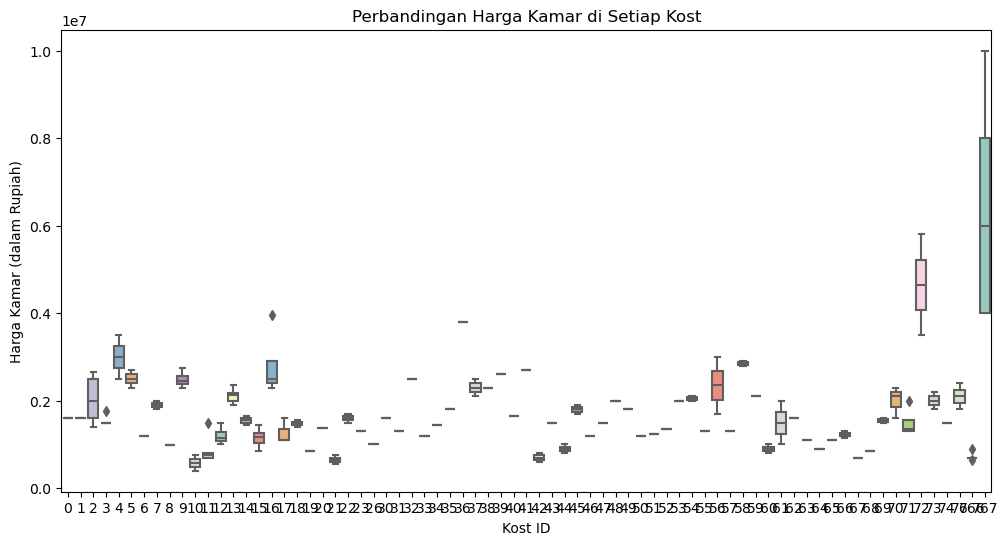

In [17]:
# Plotting the distribution of room prices
plt.figure(figsize=(12, 6))
sns.boxplot(x='kost_id', y='price', data=merged_data, palette='Set3')
plt.title('Perbandingan Harga Kamar di Setiap Kost')
plt.xlabel('Kost ID')
plt.ylabel('Harga Kamar (dalam Rupiah)')
plt.show()

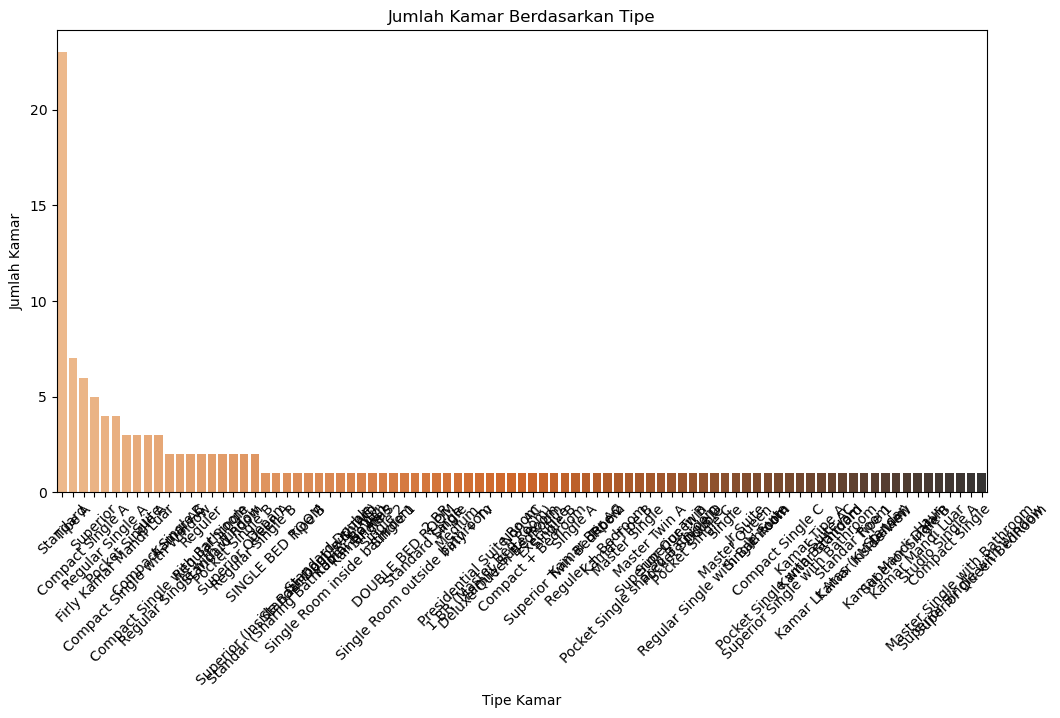

In [18]:
# Count room types
room_type_count = merged_data['name'].value_counts()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=room_type_count.index, y=room_type_count.values, palette='Oranges_d')
plt.title('Jumlah Kamar Berdasarkan Tipe')
plt.xlabel('Tipe Kamar')
plt.ylabel('Jumlah Kamar')
plt.xticks(rotation=45)
plt.show()

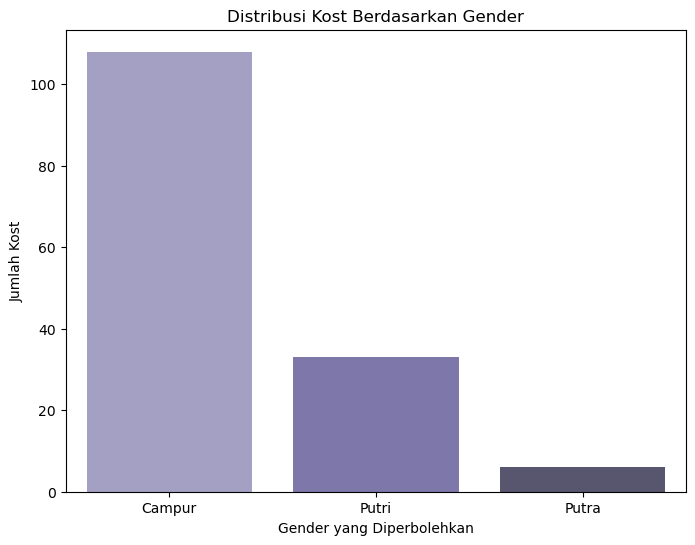

In [19]:
# Count kost by gender
gender_count = merged_data['gender'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_count.index, y=gender_count.values, palette='Purples_d')
plt.title('Distribusi Kost Berdasarkan Gender')
plt.xlabel('Gender yang Diperbolehkan')
plt.ylabel('Jumlah Kost')
plt.show()

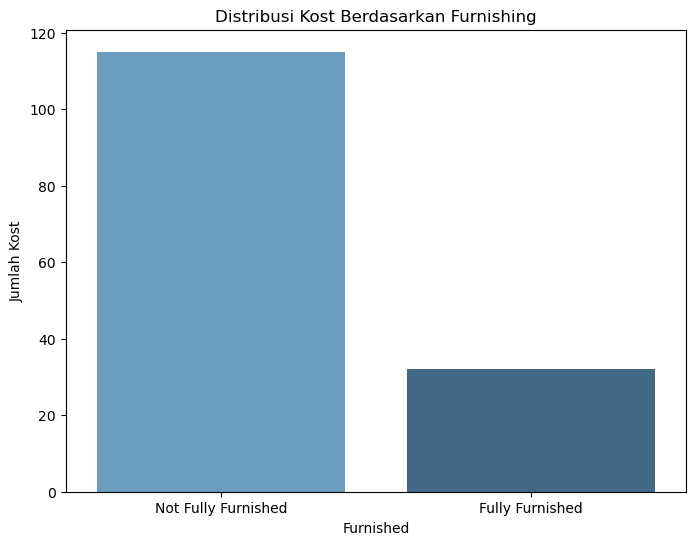

In [20]:
# Count furnished status
furnished_count = merged_data['furnished'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=furnished_count.index, y=furnished_count.values, palette='Blues_d')
plt.title('Distribusi Kost Berdasarkan Furnishing')
plt.xlabel('Furnished')
plt.ylabel('Jumlah Kost')
plt.show()